In [28]:
# We will begin by loading data and checking its structure.
# Importing nedded libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Loading the data
df = pd.read_csv("housing-sales-borough.csv")

# Display basic info and first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Code        47 non-null     object
 1   Area        47 non-null     object
 2   Sales-1995  47 non-null     int64 
 3   Sales-1996  47 non-null     int64 
 4   Sales-1997  47 non-null     int64 
 5   Sales-1998  47 non-null     int64 
 6   Sales-1999  47 non-null     int64 
 7   Sales-2000  47 non-null     int64 
 8   Sales-2001  47 non-null     int64 
 9   Sales-2002  47 non-null     int64 
 10  Sales-2003  47 non-null     int64 
 11  Sales-2004  47 non-null     int64 
 12  Sales-2005  47 non-null     int64 
 13  Sales-2006  47 non-null     int64 
 14  Sales-2007  47 non-null     int64 
 15  Sales-2008  47 non-null     int64 
 16  Sales-2009  47 non-null     int64 
 17  Sales-2010  47 non-null     int64 
 18  Sales-2011  47 non-null     int64 
 19  Sales-2012  47 non-null     int64 
 20  Sales-2013  

In [30]:
# Summary statistics
print(df.describe())

          Sales-1995     Sales-1996    Sales-1997    Sales-1998    Sales-1999  \
count      47.000000      47.000000  4.700000e+01  4.700000e+01  4.700000e+01   
mean    51739.234043   63099.361702  7.239068e+04  7.027034e+04  8.095862e+04   
std    152318.414802  185013.193588  2.110173e+05  2.042221e+05  2.341753e+05   
min       155.000000     275.000000  3.190000e+02  4.280000e+02  5.360000e+02   
25%      2473.500000    3044.000000  3.699000e+03  3.641000e+03  4.442000e+03   
50%      3081.000000    3890.000000  4.660000e+03  4.454000e+03  5.720000e+03   
75%     32880.500000   41148.000000  5.026350e+04  4.893400e+04  5.714550e+04   
max    765329.000000  929645.000000  1.060662e+06  1.026428e+06  1.175882e+06   

         Sales-2000    Sales-2001    Sales-2002    Sales-2003    Sales-2004  \
count  4.700000e+01  4.700000e+01  4.700000e+01  4.700000e+01  4.700000e+01   
mean   7.620160e+04  8.412453e+04  9.124889e+04  8.335783e+04  8.409681e+04   
std    2.207190e+05  2.437474e+05

In [31]:
# Reshaping the data from wide to long format to make it easier to analyze.
df_long = df.melt(id_vars=["Code", "Area"], var_name="Year", value_name="Sales")

# Convert "year" to integer.
df_long["Year"]= df_long["Year"].str.extract(r'(\d+)$').astype(int)

# Preview the reshaped data.
print(df_long.head())

        Code                  Area  Year  Sales
0  E09000001        City of London  1995    155
1  E09000002  Barking and Dagenham  1995    660
2  E09000003                Barnet  1995   4047
3  E09000004                Bexley  1995   2415
4  E09000005                 Brent  1995   2632


In [32]:
# Visualizing total sales over time.
# Group by year and sum all sales.
total_sales_per_year = df_long.groupby("Year")["Sales"].sum()
print(total_sales_per_year)

Year
1995    2431744
1996    2965670
1997    3402362
1998    3302706
1999    3805055
2000    3581475
2001    3953853
2002    4288698
2003    3917818
2004    3952550
2005    3380481
2006    4227311
2007    4056627
2008    2059143
2009    1975727
2010    2122925
2011    2112929
2012    2115534
2013    2553824
2014    2886435
Name: Sales, dtype: int64


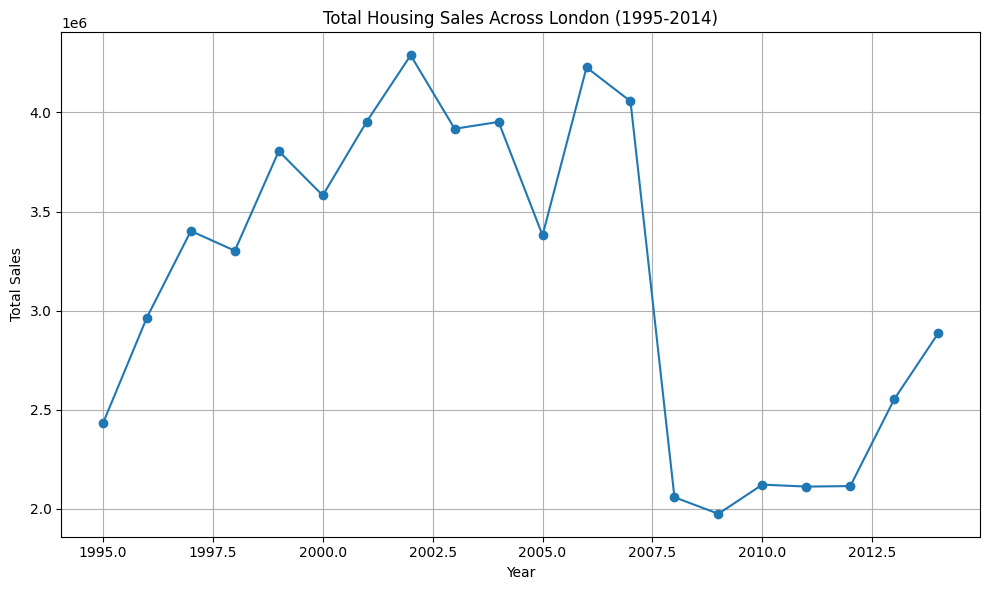

In [33]:
# Plot.
total_sales_per_year.plot(figsize=(10, 6), marker="o")
plt.title("Total Housing Sales Across London (1995-2014)")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Finding the borough with the highest growth (1995 -> 2014).
df_growth = df[["Area", "Sales-1995", "Sales-2014"]].copy()
df_growth["Growth"] = df_growth["Sales-2014"] - df_growth["Sales-1995"]

# Exclude England and Wales from growth analysis.
df_growth_no_ew = df_growth[df_growth["Area"] != "England & Wales"]
highest_growth = df_growth_no_ew.sort_values(by="Growth", ascending=False).head()

print("Borough with highest growth from 1995 to 2014:")
print(highest_growth[["Area", "Growth"]])

Borough with highest growth from 1995 to 2014:
          Area  Growth
44     England  125283
41      London   31359
42  South East   21758
43  South West   20789
40        East   17566


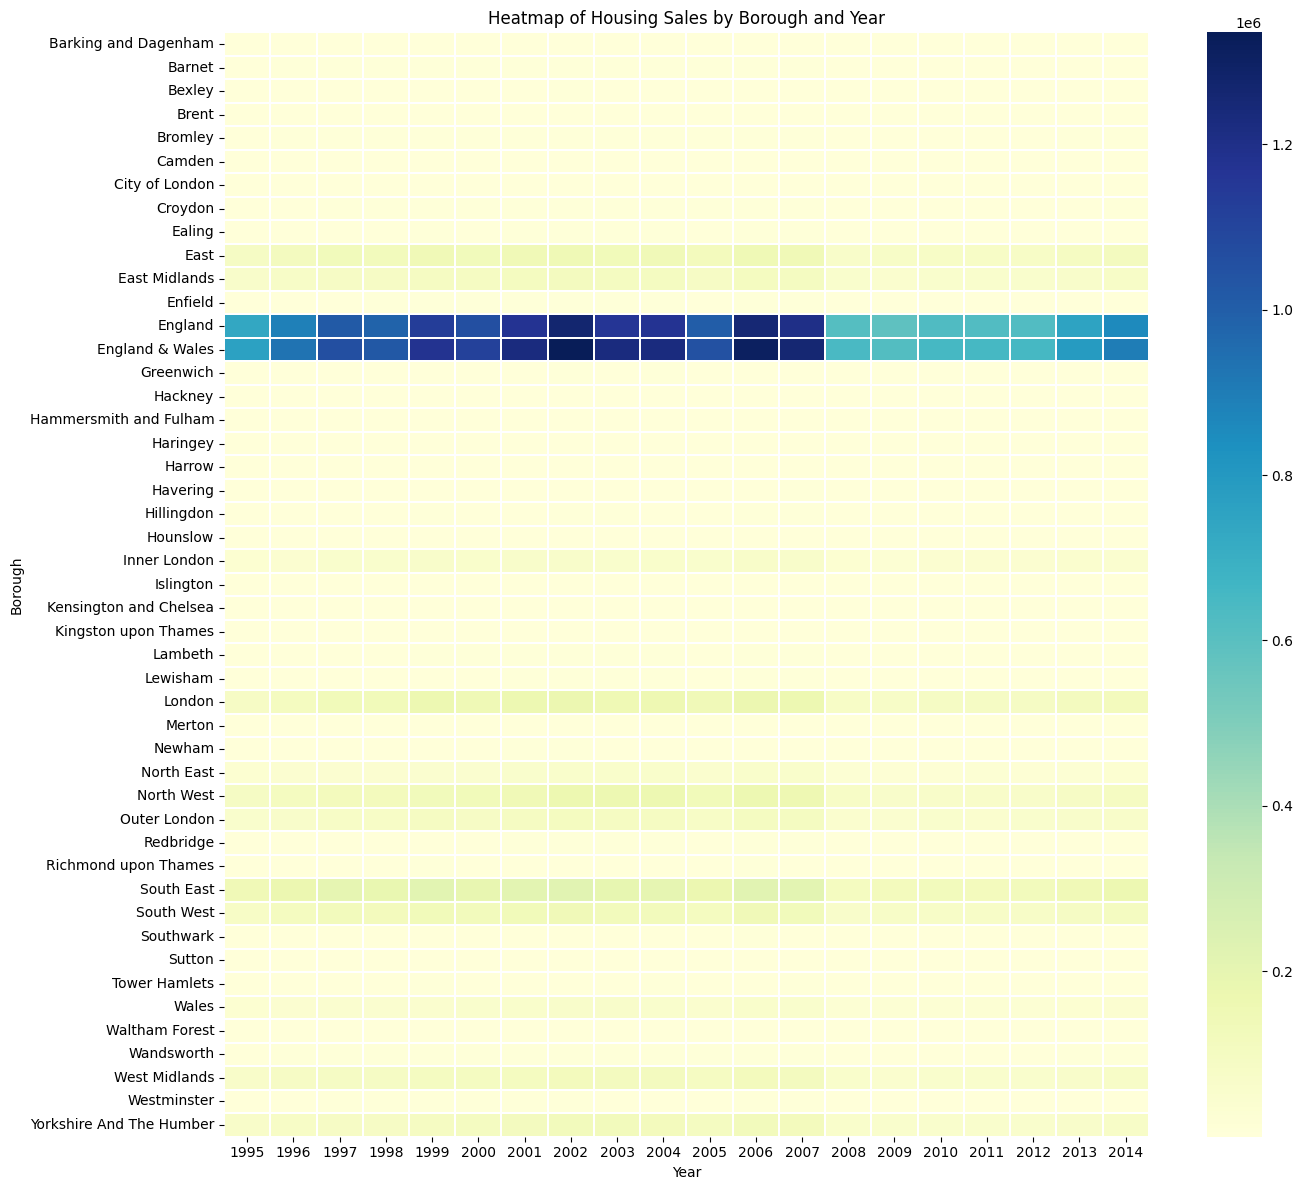

In [36]:
# Heatmap of sales by borough and year.
heatmap_data = df_long.pivot(index="Area", columns="Year", values="Sales")

plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidth=0.3)
plt.title("Heatmap of Housing Sales by Borough and Year")
plt.xlabel("Year")
plt.ylabel("Borough")
plt.tight_layout()
plt.show()